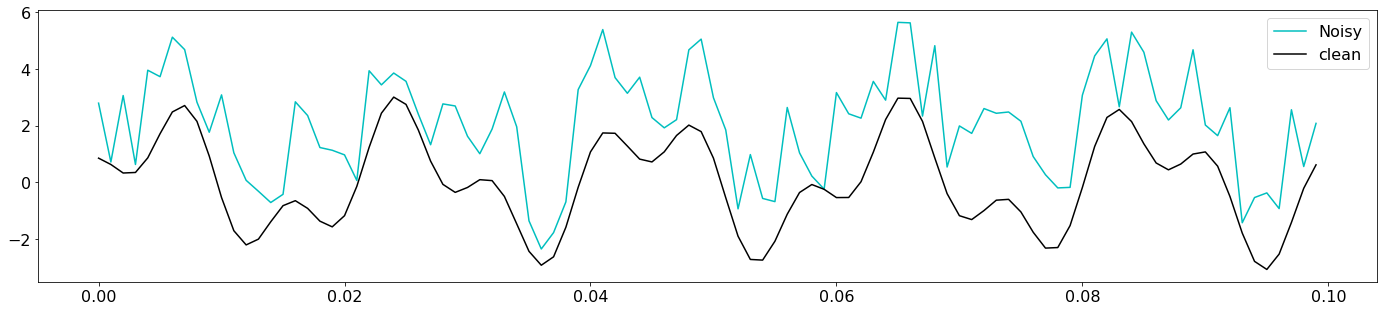

In [260]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [24, 5 ]
plt.rcParams.update({'font.size': 16})

dt = 0.001
t = np.arange(0,1,dt)
f = 1.9*np.sin(2*np.pi*50*t) + 1.2*np.sin(2*np.pi*120*t + 3*np.pi/4) 
f_clean = f
f = f + 4*np.random.rand(len(t))

lookup = 100
plt.plot(t[:lookup],f[:lookup],color='c', label='Noisy')
plt.plot(t[:lookup],f_clean[:lookup],color='k', label='clean')
# plt.xlim(t[0],t[-1])
plt.legend()

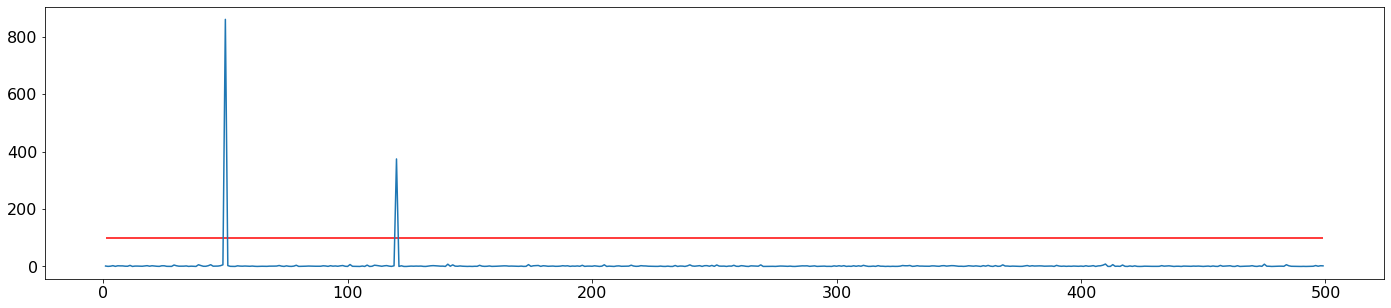

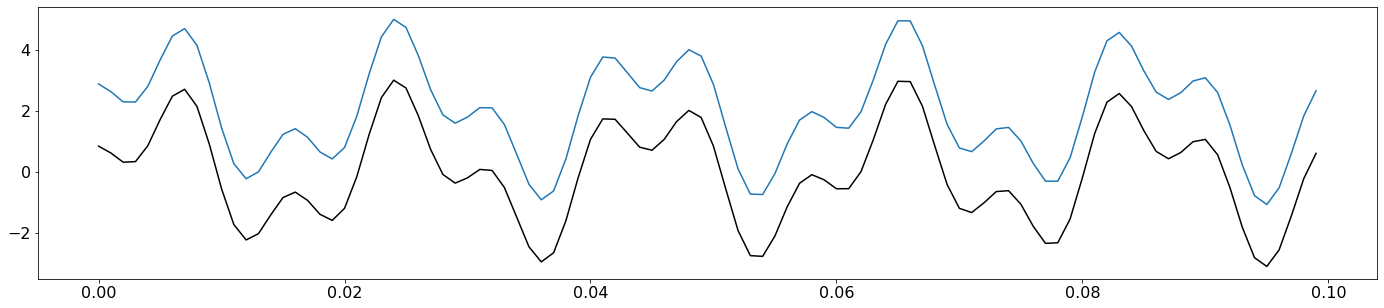

In [262]:
n = len(t)

fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n))* np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

std = np.std(PSD)
mean = np.mean(PSD)
maxval = mean + std
maxval = 100
indices = PSD >= maxval

plt.plot(freq[L],PSD[L])
plt.hlines(y=maxval, xmin=L[0], xmax=L[-1], color='r')
plt.show()

PSDclean = PSD * indices
fhat = fhat * indices 
ffilt = np.fft.ifft(fhat)

plt.plot(t[:100],ffilt[:100])
plt.plot(t[:lookup],f_clean[:lookup],color='k', label='clean')

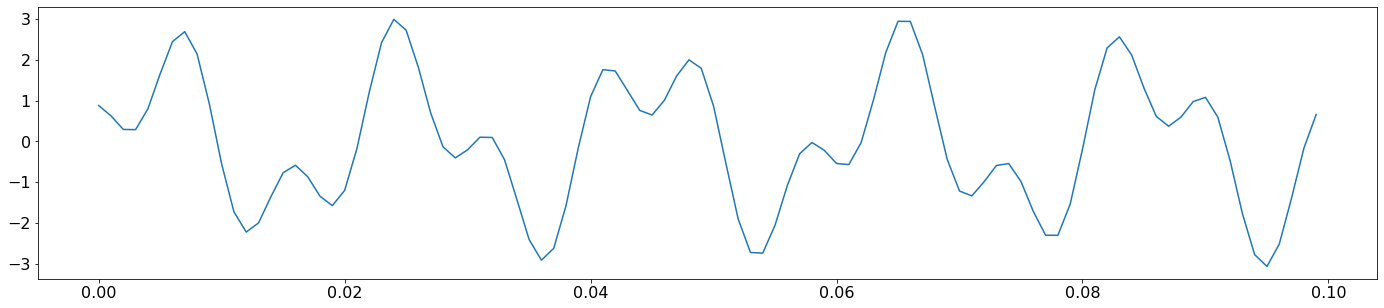

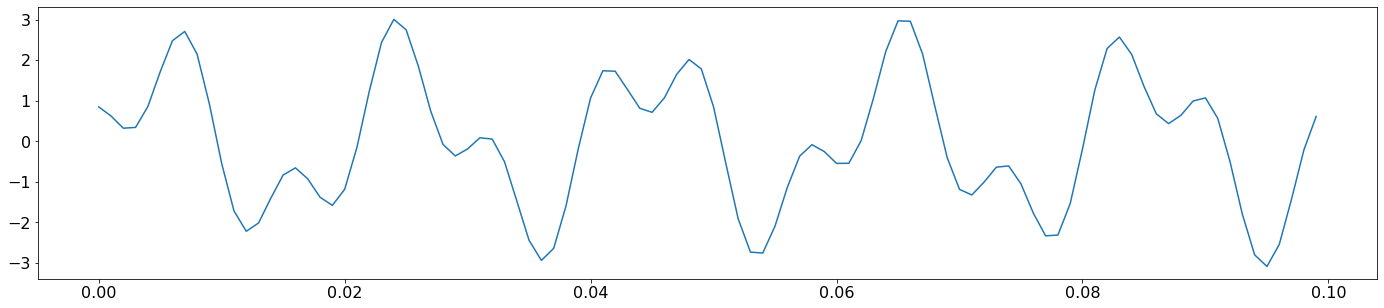

In [263]:
freqs = freq[L] * indices[L]
true_freqs = np.delete(freqs , np.where(freqs == 0))
phase = np.angle(fhat[L]) +np.pi/2
ampli = np.sqrt(fhat[L].real**2 + fhat[L].imag**2)/500

t = np.arange(0,1,dt)

A = ampli[int(true_freqs[0]-1)]
phi = phase[int(true_freqs[0]-1)]
f = A*np.sin(2*np.pi*true_freqs[0]*t + phi)
for fr in true_freqs[1:]:
    A = ampli[int(fr-1)]
    phi = phase[int(fr-1)]
    f = f + A*np.sin(2*np.pi*fr*t + phi)


lookup = 100
plt.plot(t[:lookup], f[:lookup])
plt.show()
plt.plot(t[:lookup], f_clean[:lookup])
plt.show()